In [2]:
#Importar librerias - Clase
import pandas as pd
import numpy as np
from datetime import datetime
#importar yfinance (instalado arriba) para tener datos de mercado financiero
import yfinance as yf
#Importar librerias de Visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Genero dataframes dinamico  VALIDO EN GOOGLE COLAB
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

# Datos

In [4]:
#DATOS
ticker = 'PAM'
DESDE  = '2011-01-01'
HASTA = datetime.now().strftime("%Y-%m-%d")
INTERVALO = '1d'
TARGET = 'Adj Close'

In [5]:

#hago una funcion para ocultar la sintaxis de la libreria y usar mi formato
def market_data (ticker,desde,hasta,intervalo):
    datos=yf.download(ticker, start=desde, end=hasta,interval=intervalo)
    return datos
#bajar datos para un periodo especifico usando la funcion de arriba
precios_historicos = market_data(ticker,
                                 desde= DESDE,
                                 hasta= HASTA,
                                 intervalo= INTERVALO)

[*********************100%%**********************]  1 of 1 completed


# Grafico

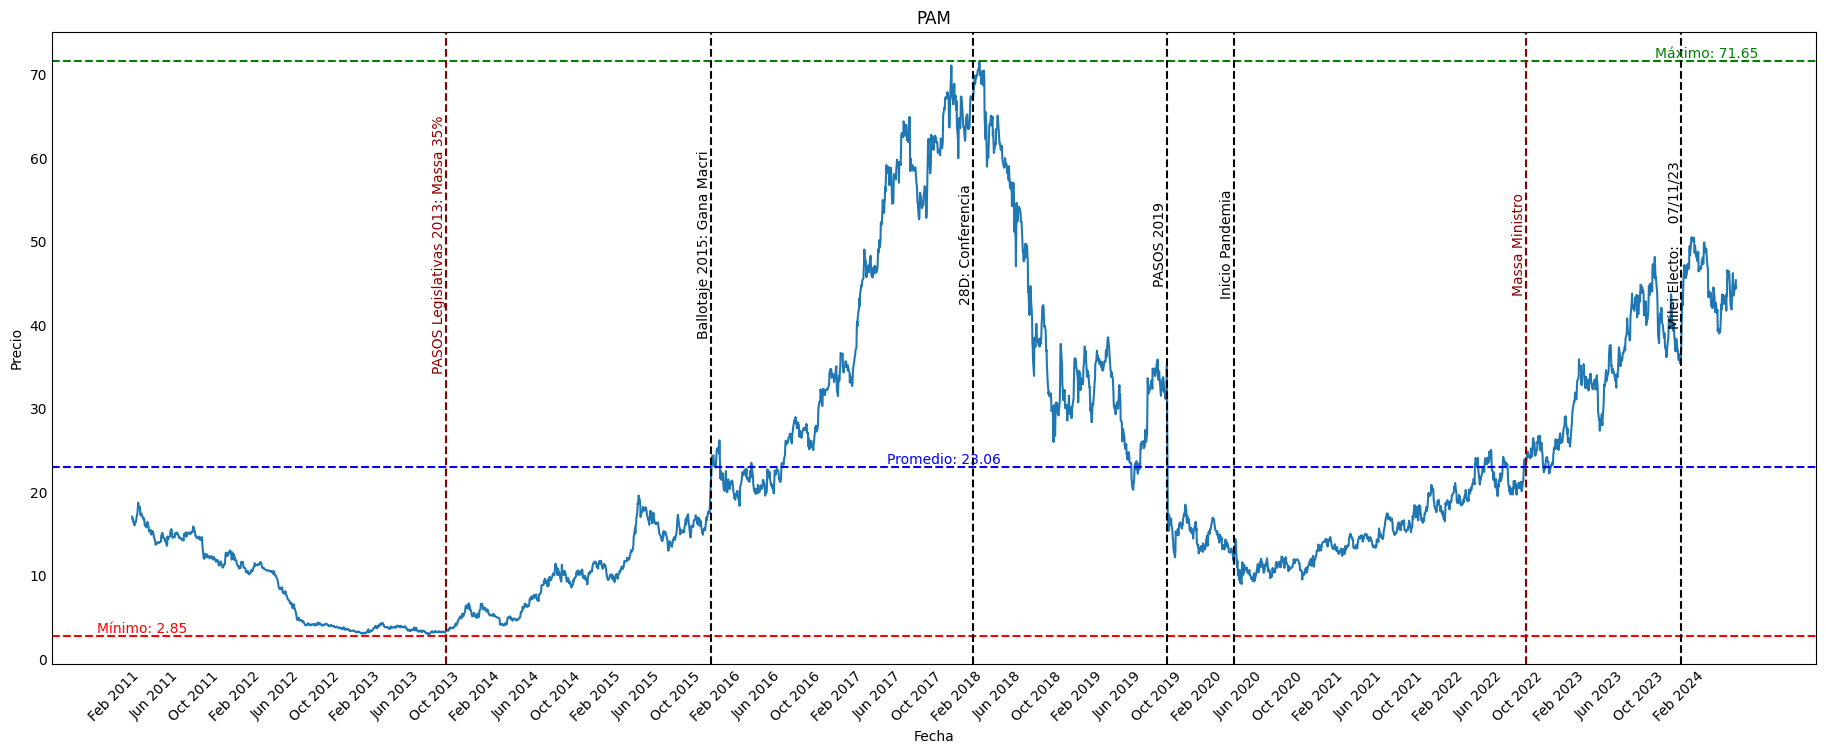

In [6]:
# Graficar----------------------------------------------------------------------------------------------------------------
mpl.style.use('_mpl-gallery-nogrid')  #Definir el Estilo del grafico
plt.figure(figsize=(18, 8)) # Definir el tamaño de la figura


PRECIO= precios_historicos[TARGET]
PRECIO.plot()

# Agregar líneas horizontales para valores estadísticos y verticales para fechas específicas

# Obtener valores estadísticos
precio_maximo = PRECIO.max()
precio_promedio = PRECIO.mean()
precio_minimo = PRECIO.min()

# Trazar líneas horizontales en los valores estadísticos
plt.axhline(y=precio_maximo, color='g', linestyle='--', label=f'Máximo: {precio_maximo:.2f}')
plt.axhline(y=precio_promedio, color='b', linestyle='--', label=f'Promedio: {precio_promedio:.2f}')
plt.axhline(y=precio_minimo, color='r', linestyle='--', label=f'Mínimo: {precio_minimo:.2f}')

# Trazar líneas verticales en fechas específicas
plt.axvline(x='2013-08-12', color='darkred', linestyle='--', label=f'PASOS Legislativas 2013: Pierden los K')
plt.axvline(x='2015-10-25', color='k', linestyle='--', label='Ballotaje 2015: Gana Macri')
plt.axvline(x='2017-12-28', color='k', linestyle='--', label='28D: Conferencia')
plt.axvline(x='2019-08-11', color='k', linestyle='--', label='PASOS 2019')
plt.axvline(x='2020-03-01', color='k', linestyle='--', label='Inicio Pandemia')
plt.axvline(x='2022-08-03', color='darkred', linestyle='--', label='Massa Ministro 01 Jun 2022')
plt.axvline(x='2023-11-17', color='k', linestyle='--', label=f'Milei Electo 17 Nov 2023')


# Establecer los marcadores mensuales en el eje x
fechas_mensuales = pd.date_range(start=PRECIO.index.min(), end=PRECIO.index.max(), freq='4MS')
plt.xticks(fechas_mensuales, [date.strftime('%b %Y') for date in fechas_mensuales], rotation=45)

# Agregar título y nombres de ejes
plt.title(ticker)
plt.xlabel('Fecha')
plt.ylabel('Precio')

# Calcular las coordenadas para las etiquetas de los ejes horizontales
coord_y_max = precio_maximo
coord_y_promedio = precio_promedio
coord_y_min = precio_minimo

# Ajustar la alineación para ubicar las etiquetas a la derecha y hacia arriba
ha_alignment = 'center'
va_alignment = 'bottom'

# Agregar etiquetas a las líneas horizontales
plt.text(fechas_mensuales[-1], coord_y_max, f'Máximo: {precio_maximo:.2f}', rotation=0, color='g', ha=ha_alignment, va=va_alignment)
plt.text(fechas_mensuales[int(len(fechas_mensuales) / 2)], coord_y_promedio, f'Promedio: {precio_promedio:.2f}', rotation=0, color='b', ha=ha_alignment, va=va_alignment)
plt.text(fechas_mensuales[0], coord_y_min, f'Mínimo: {precio_minimo:.2f}', rotation=0, color='r', ha=ha_alignment, va=va_alignment)
# Calcular la altura media
altura_media = (precio_maximo + precio_minimo) / 1.5

# Agregar etiquetas a las líneas verticales en la mitad superior del gráfico
plt.text('2013-08-12', altura_media, 'PASOS Legislativas 2013: Massa 35%', rotation=90, color='darkred', ha='right', va='center')
plt.text('2015-10-25', altura_media, 'Ballotaje 2015: Gana Macri', rotation=90, color='k', ha='right', va='center')
plt.text('2017-12-28', altura_media, '28D: Conferencia', rotation=90, color='k', ha='right', va='center')
plt.text('2019-08-11', altura_media, 'PASOS 2019', rotation=90, color='k', ha='right', va='center')
plt.text('2020-03-01', altura_media, 'Inicio Pandemia', rotation=90, color='k', ha='right', va='center')
plt.text('2022-08-03', altura_media, 'Massa Ministro', rotation=90, color='darkred', ha='right', va='center')
plt.text('2023-11-17', altura_media, 'Milei Electo:     07/11/23', rotation=90, color='k', ha='right', va='center')

# Guardar el gráfico en una carpeta llamada "MisGraficos" en Google Drive
#plt.savefig('/content/drive/My Drive/Colab Notebooks/PyGraficos/Argy_2013-HOY.png')
plt.savefig('Argy_2011-HOY.png')

# Mostrar el gráfico
plt.show()

# Estadisticas

# Grafico Dinamico